## Encoding Text using BERT


* BERT: Bidirectional Encoder Representations Transformer is a pre-trained transformer that encodes text into the latent space. 

* When a list of textual data are encoded into vectors, these vectors form a space that is called the latent space.

* The closer two vectors are to each other, the more similar the textual items are to each other 

(distance = semantic similarity).

* These vectors (embeddings) are mostly either 512D or 768D. UMAP or t-SNE can turn them into 2D or 3D for visualization.



Write code to encode a list of textual items using the base model of BERT (from Hugging Face). Store the resulting embeddings for each textual item and visualize them in 2D (using UMAP or t-SNE). 


The visualization is considered a mapped latent space.

## Encoding Text

In [1]:
# Open and read the text file
with open('sherlock-return-short.txt', 'r', encoding='utf-8') as file:
    text_content = file.read()

# Display the first 500 characters of the text to ensure it's read correctly
print(text_content[:500])






                          THE RETURN OF SHERLOCK HOLMES

                               Arthur Conan Doyle



                                Table of contents

               The Adventure of the Empty House
               The Adventure of the Norwood Builder
               The Adventure of the Dancing Men
               The Adventure of the Solitary Cyclist
               The Adventure of the Priory School
               The Adventure of Black Peter
               The Adventure of Charles 


In [2]:
from sentence_transformers import SentenceTransformer

text_language_processing = "Machine learning and text processing are integral components of natural language processing (NLP), a field that focuses on enabling computers to understand, interpret, and generate human language. Machine learning algorithms, such as neural networks, support vector machines, and decision trees, are employed to analyze and extract meaningful insights from textual data. These algorithms learn patterns and relationships within the data, enabling tasks such as sentiment analysis, text classification, named entity recognition, and machine translation. Text processing involves various techniques such as tokenization, stemming, lemmatization, and part-of-speech tagging to preprocess and structure textual data for machine learning models. Through the synergy of machine learning and text processing, NLP systems can handle complex language tasks, providing valuable solutions across industries, including customer service automation, content recommendation, and information retrieval."
text_transformer_models = "Transformers, a groundbreaking innovation in natural language processing and machine learning, represent a pivotal shift from traditional recurrent and convolutional neural network architectures. Introduced by Vaswani et al. in 2017, transformers have revolutionized various tasks in NLP, including translation, sentiment analysis, and question answering. At their core, transformers rely on a self-attention mechanism to weigh the significance of different words in a sequence, enabling them to capture long-range dependencies efficiently. Unlike RNNs and CNNs, transformers process entire sequences in parallel, making them inherently faster and more parallelizable. Additionally, transformers incorporate positional encoding to preserve the sequential order of input tokens. Pre-trained transformer models like BERT, GPT, and T5 have achieved remarkable performance across a wide range of NLP benchmarks, often surpassing human-level performance on tasks such as language understanding and generation. Furthermore, transformers' attention mechanism facilitates interpretability by highlighting important words and phrases in the input, contributing to their widespread adoption and continued advancement in the field of artificial intelligence."
text_french_revolution = "The French Revolution, spanning from 1789 to 1799, was a transformative period in French history characterized by radical social, political, and cultural upheaval. Fueled by economic hardship, social inequality, and Enlightenment ideals of liberty, equality, and fraternity, the revolution saw the overthrow of the monarchy, the establishment of a republic, and the rise of Napoleon Bonaparte. The revolutionaries aimed to dismantle the ancien régime, which was characterized by absolute monarchy and feudal privileges, and replace it with a more democratic and egalitarian system. The revolution brought about sweeping changes, including the abolition of feudal privileges, the Declaration of the Rights of Man and of the Citizen, and the secularization of society. However, it also led to violence, terror, and political instability, exemplified by the Reign of Terror, where thousands of perceived enemies of the revolution were executed."

bert_model = SentenceTransformer("bert-base-uncased")
encodings = []
for item in [text_language_processing, text_transformer_models, text_french_revolution, text_content]:
    encoding = bert_model.encode(item)
    encodings.append(encoding)

print(encoding.shape)
encoding_string = " ".join([str(num) for num in encoding])
print(encoding_string[:55] + " ... " + encoding_string[-56:])

C:\Users\SAMI\anaconda3\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
No sentence-transformers model found with name bert-base-uncased. Creating a new one with mean pooling.
C:\Users\SAMI\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


(768,)
-0.353029 0.017545678 0.07069087 -0.38075596 0.33338204 ... 0928944 0.17475429 -0.07888033 0.0022598729 -0.041137747


## Mapping and Visualizing

[[ 29.139711     3.9056501 ]
 [ 21.662386    42.888927  ]
 [-27.153833     0.81780535]
 [-21.75454     84.62889   ]]


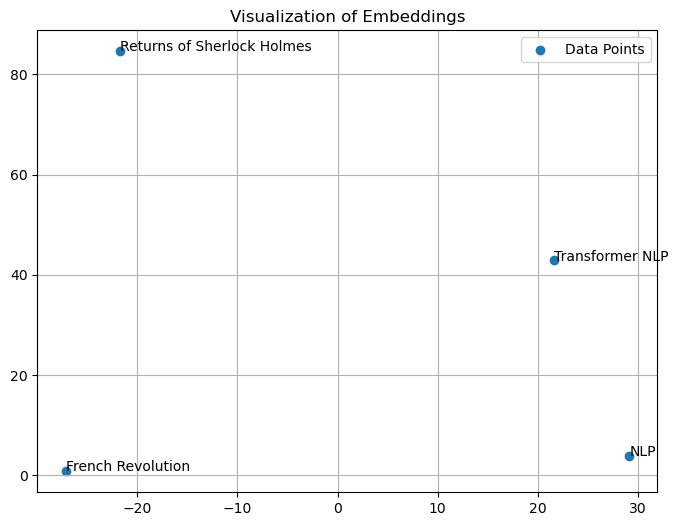

In [4]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Convert list of vectors to a NumPy array
array = np.array(encodings)

# Create a t-SNE object with desired parameters
tsne = TSNE(n_components=2, perplexity=2)

# Fit t-SNE to the data and transform it to 2D
mappings = tsne.fit_transform(array)
print(mappings)

plt.figure(figsize=(8, 6))
plt.scatter(mappings[:, 0], mappings[:, 1], label='Data Points')
for i, txt in enumerate(['NLP', 'Transformer NLP', 'French Revolution', 'Returns of Sherlock Holmes']):
    plt.annotate(txt, (mappings[i, 0], mappings[i, 1]))
plt.title('Visualization of Embeddings')
plt.legend()
plt.grid(True)
plt.show()
